In [249]:
from model.poisson_vhmm import PoissonVHMM
import jax
from numpy.random import gamma, poisson
import numpy as np

%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [236]:
### generate test data

cluster_num = 2
batch = 10
time = 100

pi_dirichlet = 5. * np.ones(cluster_num)
A_dirichlet = 10. * np.eye(cluster_num) + 1.0 * np.ones((cluster_num, cluster_num))

pi = np.random.dirichlet(pi_dirichlet)
A = np.array([np.random.dirichlet(A_dirichlet[i]) for i in range(cluster_num)])

lam_gamma_a = 3.
lam_gamma_b = 0.01

lam = np.random.gamma(lam_gamma_a, 1/lam_gamma_b, size=cluster_num)

state = np.zeros((time, batch), dtype=np.int16)
for i in range(time):
    if i == 0:
        state[0] = np.random.multinomial(n=1, pvals=pi, size=state[0].shape).argmax(-1)
    else:
        for b in range(batch):
            state[i][b] = np.random.multinomial(n=1, pvals=A[state[i-1][b]], size=1).argmax(-1)

obs = np.zeros((time, batch, cluster_num))
for i in range(time):
    for b in range(batch):
        obs[i][b] = np.random.poisson(lam[state[i][b]])


In [237]:
print(A)
print(pi)

[[0.89784191 0.10215809]
 [0.26921168 0.73078832]]
[0.41832819 0.58167181]


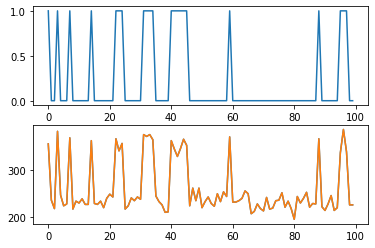

In [238]:
import matplotlib.pyplot as plt

plt.subplot(2, 1, 1)
plt.plot(state[:, 0])
plt.subplot(2, 1, 2)
plt.plot(obs[:, 0])


In [250]:
import jax.numpy as jnp
cluster_num = 2
model = PoissonVHMM(cluster_num,
                    init_state_prior=jnp.array([1., 1.1]),
                    transition_prior=10*jnp.eye(cluster_num) +  1.0 * np.ones((cluster_num, cluster_num)),
                    poisson_prior=jnp.array([3., 0.01]))

In [251]:
gamma, viterbi = model.fit(jnp.array(obs))

-4294.67
-213.6571
4216.043
1389.845
0.0
-9686.9
-3536.2087
-213.53223
7901.923
1389.995
842.1233
-13456.718
1119.3192
-227.20929
46269.547
1313.8773
991.9635
-47228.863
1333.6323
-235.90276
65984.69
1259.1609
896.0711
-66570.38
1286.9208
-235.72064
68105.336
1257.7196
51.30508
-67891.72
1262.6836
-236.10976
68056.88
1253.8105
15.622036
-67827.52
1261.8624
-236.23814
68051.08
1252.7811
15.574318
-67821.336
1261.856
-236.17596
68060.984
1252.6953
15.593806
-67831.24
1261.7566
-236.05096
68042.69
1252.6902
15.551108
-67813.125
1261.8185
-236.11346
68049.234
1252.6907
15.562342
-67819.555
1261.8237
-236.051
68054.97
1252.688
15.566309
-67825.34
1261.7744
-236.17596
68042.484
1252.6909
15.613598
-67812.836
1261.8477
-235.98848
68058.69
1252.689
15.573397
-67829.11
1261.7914
-236.05096
68046.04
1252.6895
15.609784
-67816.49
1261.8352
-236.051
68057.28
1252.688
15.578058
-67827.664
1261.8552
-236.05096
68059.19
1252.6895
15.590153
-67829.56
1261.8778
-236.05098
68063.55
1252.6892
15.570515
-

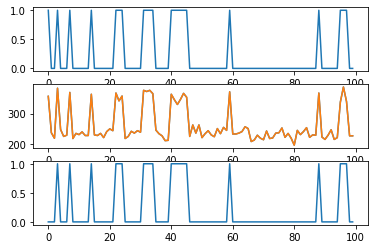

In [241]:
plt.subplot(3, 1, 1)
plt.plot(state[:, 0])
plt.subplot(3, 1, 2)
plt.plot(obs[:, 0])
plt.subplot(3, 1, 3)
plt.plot(viterbi[:, 0])

None
